<a href="https://colab.research.google.com/github/KoMurase/movie_research_2/blob/master/research_ReadyPlayer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ÊñπÈáù: TextCNN„ÇíÁî®„ÅÑ„Å¶ÂêÑ„Çπ„Ç≥„Ç¢„Å´ÂØæ„Åó„Å¶„ÇØ„É©„ÇπÂàÜÈ°û„ÇíË°å„ÅÜ <br>
(ÂÖ∑‰ΩìÁöÑ„Å™ÊñπÊ≥ï) <br>
„É¨„Éì„É•„ÉºÔºàË©ï‰æ°ÔºâÊñáÁ´†„Å´ÂØæ„Åô„Çã„Çπ„Ç≥„Ç¢„ÇíÂ≠¶Áøí„Åï„Åõ„Çã <br>
„Çπ„Ç≥„Ç¢„ÅØ0.1Âàª„Åø„ÅÆÈõ¢Êï£ÂÄ§„ÅÆ„Åü„ÇÅ„ÇØ„É©„ÇπÂàÜÈ°û„ÇíË°å„ÅÜ <br>
‰ªäÂõû„ÅØ„Çπ„Ç≥„Ç¢„ÇíÂõõÊç®‰∫îÂÖ•„Åó„Å¶Êï¥Êï∞„Å´„Åó„Å¶Ë°å„ÅÜ <br> 
„Çà„Å£„Å¶5„ÇØ„É©„Çπ„ÅÆ„Çπ„Ç≥„Ç¢„Å´ÂØæ„Åô„ÇãÂêÑ„É¨„Éì„É•„Éº„ÅÆ„ÇØ„É©„ÇπÂàÜÈ°û„Å®„Åô„Çã

In [143]:
!pip install japanize-matplotlib
!apt-get -q -y install swig 
!apt-get install mecab
!apt-get install libmecab-dev
!apt-get install mecab-ipadic-utf8
!pip install mecab-python3
!pip install unidic-lite
#Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´„ÄÄÔºàwordcloud„Å™„Å©„ÅßÂèØË¶ñÂåñ„Åô„Çã„Åü„ÇÅÔºâ
!apt-get -y install fonts-ipafont-gothic

!pip install neologdn 
#ÂçäËßí„ÇíÂÖ®Ëßí„Å´Â§âÊèõ
!pip install mojimoji

Reading package lists...
Building dependency tree...
Reading state information...
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303

In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

path = "/content/drive/My Drive/movie_research/review_csv/SF_data.csv"
data = pd.read_csv(path) 

data = data[data["title"] == "„É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One"]

In [161]:
non_score = data[data["score"] == '-']
data = data[data["score"] != '-']

#ÂâçÂá¶ÁêÜ

In [194]:
#Êï∞ÂÄ§„Ç´„É©„É†„Å´Â§âÊèõ„Åô„Çã
def prepro(df, col):
  df = df.copy() 
  df[col] = df[col].astype(float)

  return df

data = prepro(data, "score")

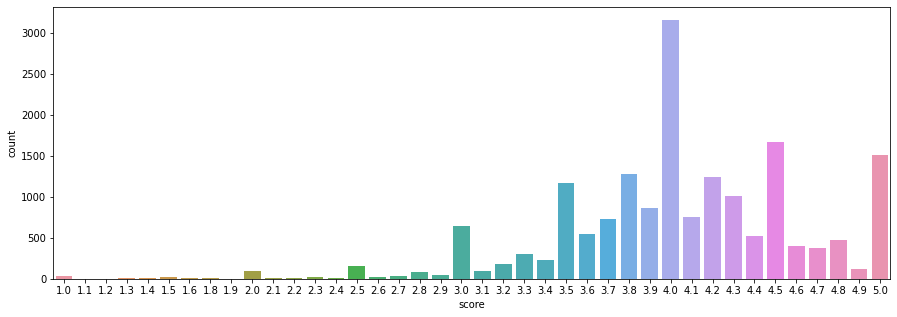

In [196]:
plt.figure(figsize=(15, 5))
sns.countplot(data["score"].sort_values())

In [197]:
#score(1,2,3,4,5)„ÅÆ5„ÇØ„É©„ÇπÂàÜÈ°û„Å´„Åô„Çã
data["score"] = data["score"].round().astype(int)

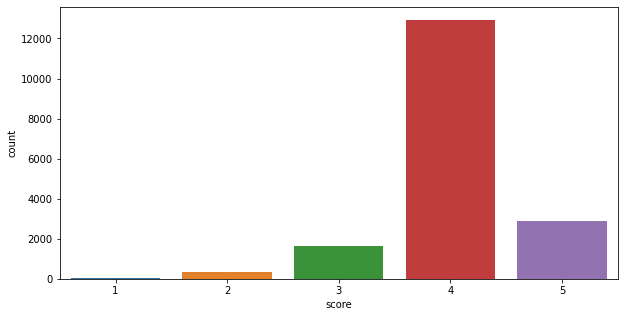

In [198]:
plt.figure(figsize=(10, 5))
sns.countplot(data["score"].sort_values())

„É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1:
Ë©ï‰æ°„ÅåÂÖ®‰ΩìÁöÑ„Å´È´ò„ÅÑÂÇæÂêë„Å´„ÅÇ„Çã„Éá„Éº„Çø„ÇíÊâ±„ÅÜ„Åì„Å®„Å´„Å™„Çä„Åù„ÅÜ



In [207]:
data["time"] = pd.to_datetime(data["time"])

In [212]:
data["time"].sample(3)

413991   2018-06-26 00:01:00
423523   2020-03-11 14:31:00
414158   2018-06-16 10:24:00
Name: time, dtype: datetime64[ns]

(array([   0., 1000., 2000., ..., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

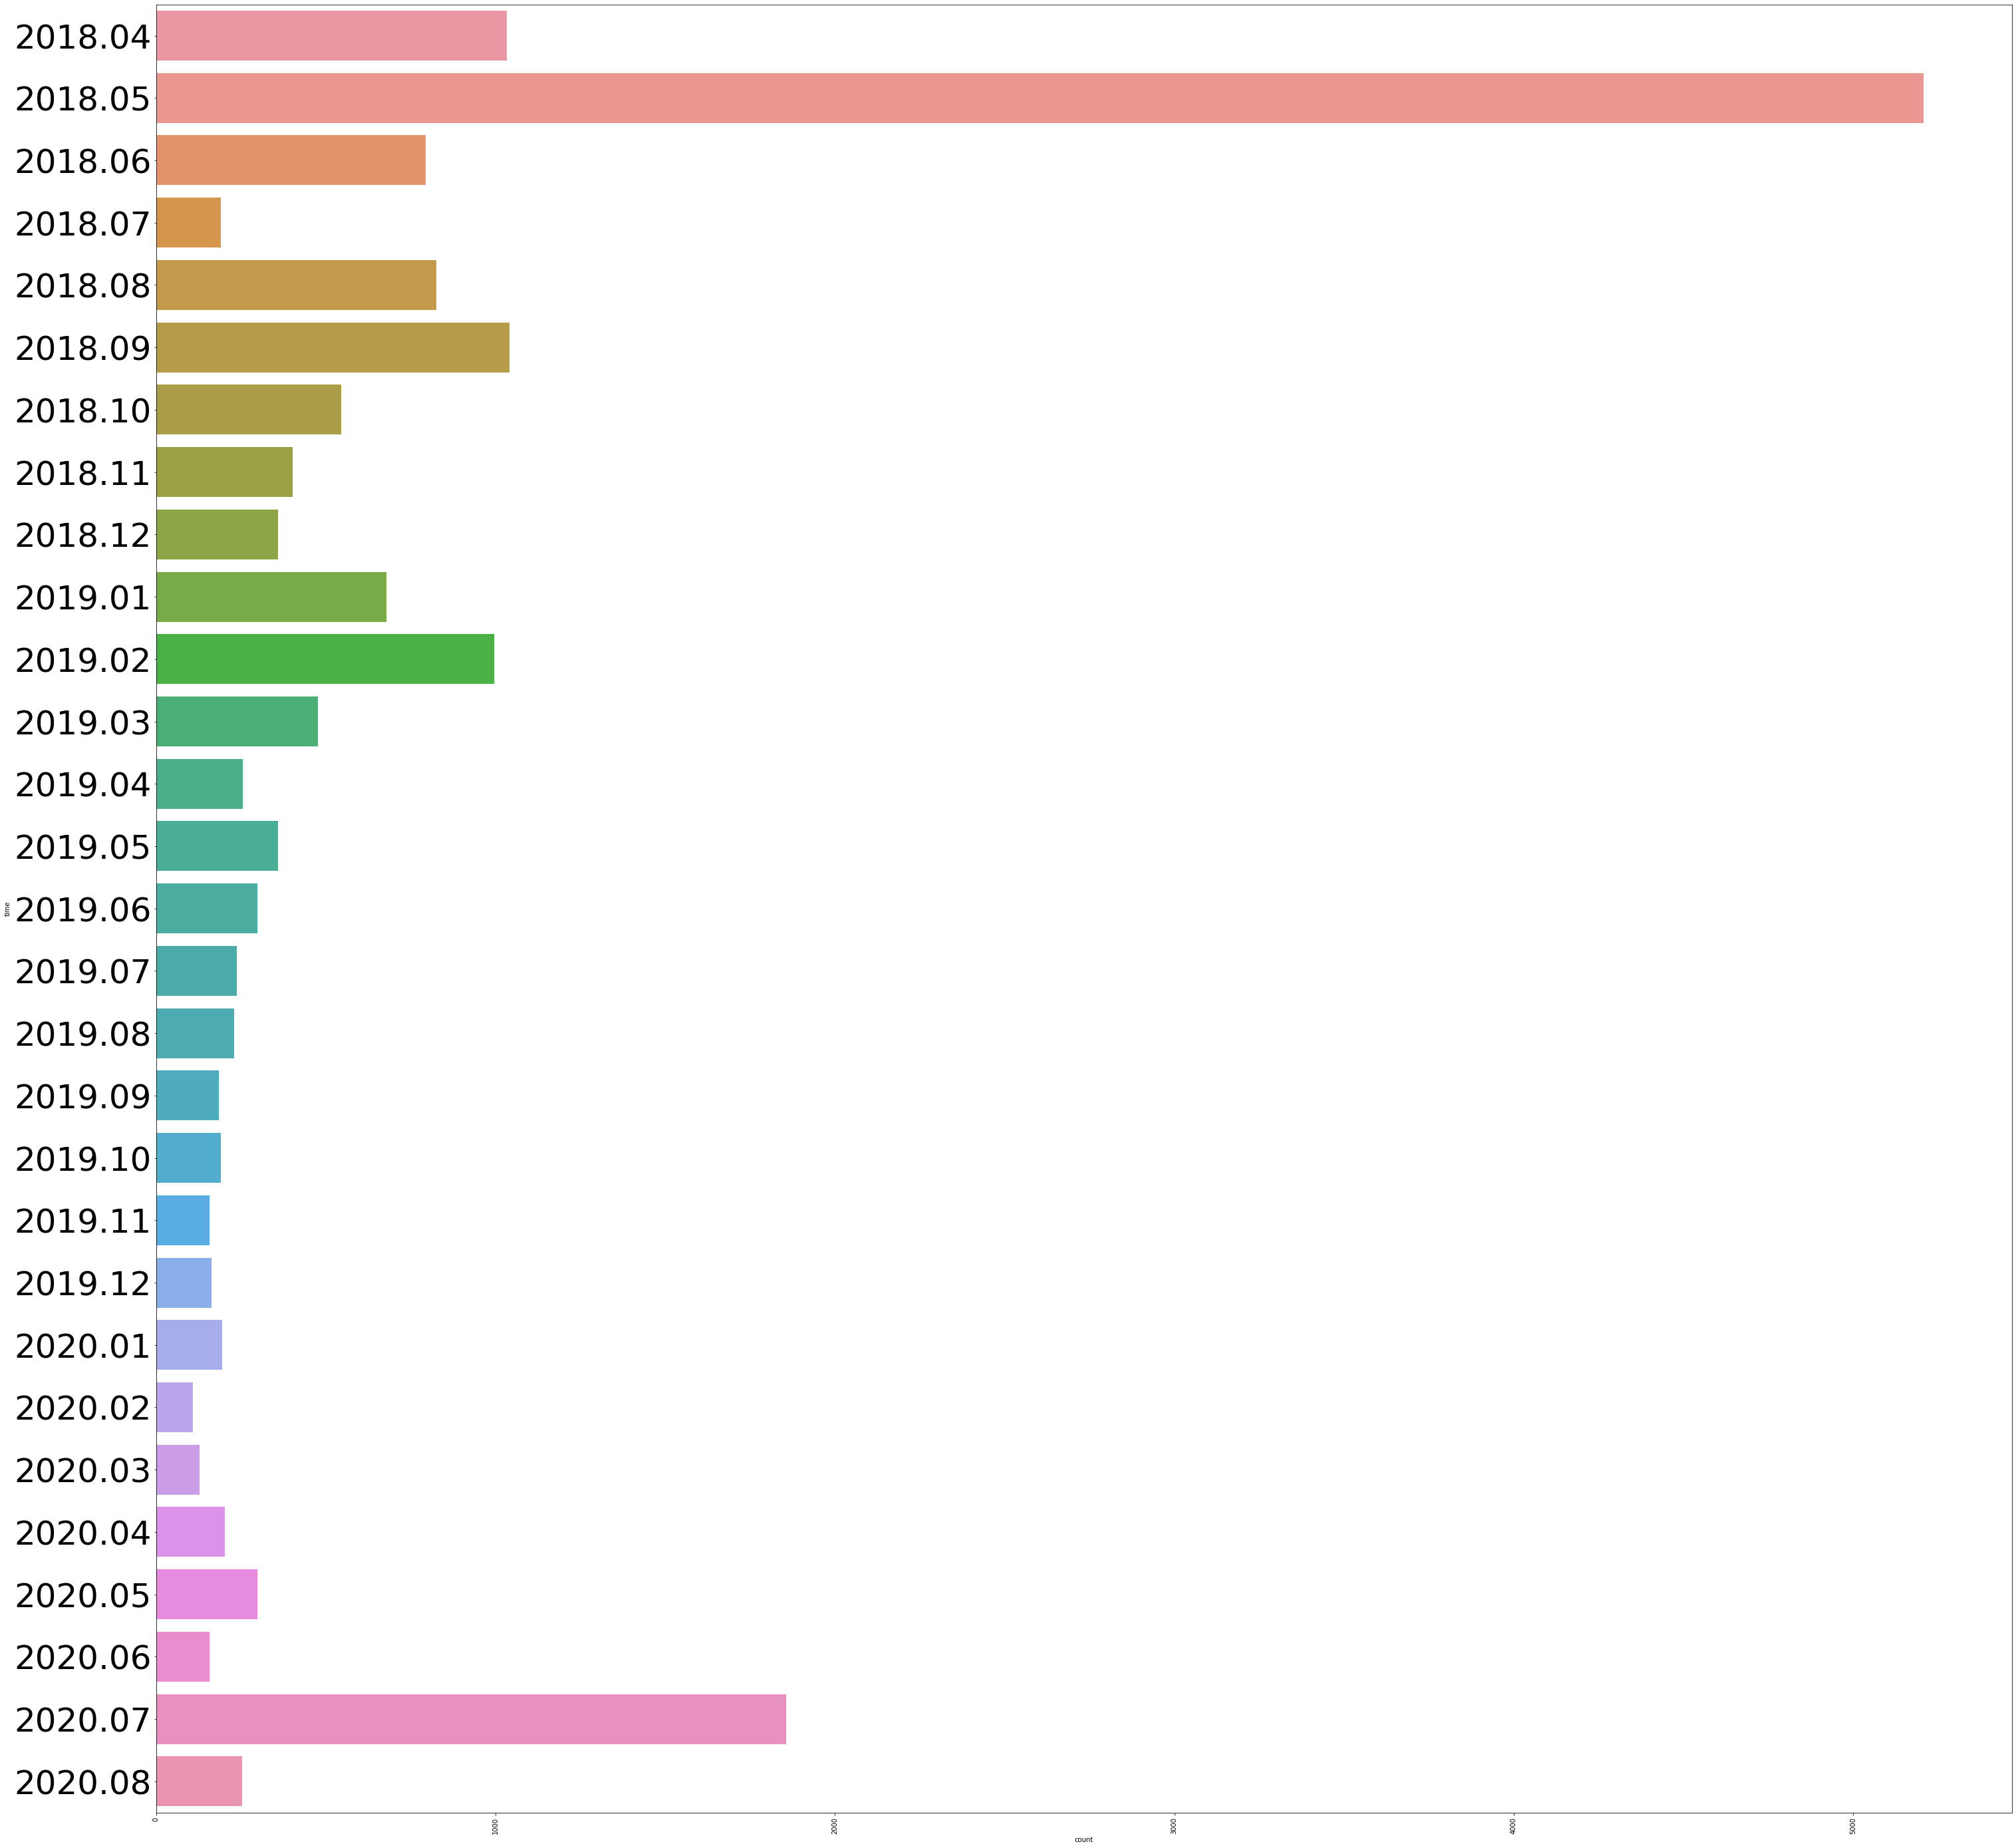

In [229]:
plt.figure(figsize=(50, 50))
sns.countplot(y=data["time"].dt.strftime('%Y.%m') )
plt.yticks(fontsize=50) #yËª∏„ÅÆ„É°„É¢„É™„Çµ„Ç§„Ç∫„ÅÆÊã°Â§ß
plt.xticks(rotation=90) #xËª∏„É©„Éô„É´„ÇíÁ∏¶„Å´Ë°®Á§∫ 

2020.7Êúà„Å´ÂÜçÂ∫¶„Ç≥„É°„É≥„ÉàÊï∞„Åå‰º∏„Å≥„Å¶„ÅÑ„Çã„ÅÆ„ÅØÈáëÊõú„É≠„Éº„Éâ„Ç∑„Éß„Éº„ÅßÊîæÊò†„Åï„Çå„Åü„Åã„Çâ„Å®ËÄÉ„Åà„Çâ„Çå„Åù„ÅÜ <br> 
ÂÖ¨ÈñãÊó•„Åå2018Âπ¥4Êúà20Êó•„ÅÆ„Åü„ÇÅÔºå„Åù„ÅÆÁøåÊúà„Å´„Ç≥„É°„É≥„ÉàÊï∞„Åå‰º∏„Å≥„Å¶„ÅÑ„Çã

In [206]:
import neologdn 
import mojimoji 
import re 

def text_preprocess(text):

  text = neologdn.normalize(text)
  #URL„ÇíÈô§Âéª„Åô„Çã
  text = re.sub(
      r'(http|https)://([-\w]+\.)+[-\w]+(/[-\w./?%&=]*)?', 
      "",
      text)
  #ÂÖ®Ëßí„Åã„ÇâÂçäËßí„Å´
  text = mojimoji.zen_to_han(text) 
  #Êï∞Â≠ó„Çí„Åô„Åπ„Å¶0„Å´ÁΩÆÊèõ
  #text = re.sub(r'\d+', '0', text)
  
  #Á©∫ÁôΩ„ÇíÈô§Âéª
  text = re.sub(r' ','', text)
  text = re.sub(r'„ÄÄ','', text)
  # „Äê„Äë„ÅÆÈô§Âéª
  text = re.sub(r'[„Äê„Äë]', '', text)
  # ÔºàÔºâ„ÅÆÈô§Âéª
  text = re.sub(r'[ÔºàÔºâ()]', '', text)
  # ÔºªÔºΩ„ÅÆÈô§Âéª
  text = re.sub(r'[ÔºªÔºΩ\[\]]', '', text)
  #„Ç¢„É´„Éï„Ç°„Éô„ÉÉ„Éà„Çí„ÅÆÂ§ßÊñáÂ≠ó„ÇíÂ∞èÊñáÂ≠ó„Å´Â§âÊèõ
  text = text.lower()
  #ÊîπË°å„Ç≥„Éº„Éâ„ÅÆÈô§Âéª
  text = text.replace('\n', '')

  return text 

In [163]:
data["review"] = data["review"].apply(text_preprocess) 

In [164]:
data["review"].sample(1).values

array(['ÊúÄÂàù„Åã„ÇâÊúÄÂæå„Åæ„ÅßÈ≥•ËÇå„ÅåÁ´ã„Å°Ê∂ô„ÅåÔæÅÔΩÆÔæÅÔΩÆÂàá„Çå„Çã„Åª„Å©„Å´Èù¢ÁôΩ„Åã„Å£„Åü‚Ä¶80Âπ¥‰ª£„ÇíÁîü„Åç„Åü‰∫∫„Å´„ÅØÊõ¥„Å´ÊÑüÊÖ®Ê∑±„Åã„Å£„Åü„ÅÆ„Åß„ÅØ„Å™„ÅÑ„Åã„Å®ÊÄù„ÅÜ„ÅÇ„Çä„Å®„ÅÇ„Çâ„ÇÜ„ÇãÔΩªÔæåÔæûÔΩ∂ÔæôÔæÅÔΩ¨ÔΩ∞„ÅåÁîªÈù¢„ÅÆÁ´Ø„Åã„ÇâÁ´Ø„Åæ„ÅßÊ∫¢„Çå„Å¶„ÅÑ„ÇãË°óÔΩ§Ê©üÊ¢∞ÔΩ§ËªäÔΩ§ÔæÉÔæûÔΩºÔæûÔæÄÔæô„ÅÆ‰∏≠„ÅÆ‰∏ñÁïåÔΩ§ÂÖ®„Å¶„ÅÆÈÄ†ÂΩ¢„Å´ÂøÉ„ÅåÊè∫„ÇäÂãï„Åã„Åï„ÇåÔæúÔΩ∏ÔæúÔΩ∏„ÅåÊ≠¢„Åæ„Çâ„ÅöÂãïÊÇ∏„Åó„Å™„Åå„ÇâË¶≥ÁµÇ„Åà„ÅüÔΩµÔæÄÔΩ∏„ÅÆÔæÇÔæéÔæû„ÇíÂÖ®ÈÉ®Á™Å„ÅÑ„Å¶„Åè„Çã'],
      dtype=object)

In [167]:
import MeCab 

def tokenize_mecab(sentence):
    """Êó•Êú¨Ë™û„ÅÆÊñá„ÇíÂΩ¢ÊÖãÁ¥†„ÅÆÂàó„Å´ÂàÜÂâ≤„Åô„ÇãÈñ¢Êï∞

    :param sentence: str, Êó•Êú¨Ë™û„ÅÆÊñá
    :return tokenized_sentence: list of str, ÂΩ¢ÊÖãÁ¥†„ÅÆ„É™„Çπ„Éà
    """
    tagger = MeCab.Tagger()
    node = tagger.parse(sentence)
    node = node.split("\n")
    tokenized_sentence = []
    for i in range(len(node)):
        feature = node[i].split("\t")
        if feature[0] == "EOS":
            # Êñá„ÅåÁµÇ„Çè„Å£„Åü„ÇâÁµÇ‰∫Ü
            break
        # ÂàÜÂâ≤„Åï„Çå„ÅüÂΩ¢ÊÖãÁ¥†„ÇíËøΩÂä†
        tokenized_sentence.append(feature[0])
    return " ".join(tokenized_sentence)

In [168]:
data["review_tokenize"] = data["review"].apply(tokenize_mecab)

In [176]:
data["length"] = data["review_tokenize"].apply(lambda x: len(x.split(' ')))

In [177]:
np.set_printoptions(threshold=1)
print(data[data["length"]==3002]["review"].values )

['„Åì„ÅÆÊò†Áîª„Åå2018Âπ¥4Êúà„Å´Êó•Êú¨ÂÖ¨Èñã„Åï„Çå„Å¶ÔΩ§„Åª„Åº1Âπ¥„ÅåÁµåÈÅé„Åô„ÇãÔΩ°8090Âπ¥‰ª£ÔæéÔæüÔΩØÔæåÔæüÔΩ∂ÔæôÔæÅÔΩ¨ÔΩ∞„Å∏„ÅÆÔΩµÔæèÔΩ∞ÔΩºÔæûÔΩ≠„Å´Ê∫¢„Çå„ÅüsfÊò†ÁîªÔΩ°ÂêçÂå†ÔΩΩÔæãÔæüÔæôÔæäÔæûÔΩ∞ÔΩ∏ÔæûÁõ£Áù£„ÅÆ‰πÖ„Åó„Å∂„Çä„ÅÆÂ®ØÊ•Ω‰ΩúÂìÅ„Å∏„ÅÆÊú¨Ê†ºÁöÑÂæ©Â∏∞„Å´Â§ß„ÅÑ„Å´ËààÂ•Æ„Åó„ÅüÔΩ°80Âπ¥‰ª£„Å´ÈùíÊò•„ÇíÈÅé„Åî„ÅóÔΩ§ÔΩΩÔæãÔæüÔæôÔæäÔæûÔΩ∞ÔΩ∏ÔæûÊò†Áîª„ÅßËÇ≤„Å£„ÅüÁßÅ„ÅÆ‰∏ñ‰ª£„Å´„ÅØË∂ÖÔΩΩÔæÑÔæóÔΩ≤ÔΩ∏„Å™Ë¥à„ÇäÁâ©ÔΩ°„Åó„Åã„Åó‰∏ÄÊäπ„ÅÆ‰∏çÂÆâ„ÇÇÊÆã„Çã„ÅÆ„Å†„Å£„Åü‚Ä¶ÔΩ°ÂäáÂ†¥ÂÖ¨ÈñãÊôÇ„Å´ÈëëË≥û„ÅóÔΩ§„Åù„ÅÆÂæådvd„ÇÇË≥ºÂÖ•„Åó„Å¶ÔΩµÔæèÔΩ∞ÔΩºÔæûÔΩ≠„ÇíÊé¢„Åó„Å¶10Âõû„Åè„Çâ„ÅÑË¶ã„Åü„Å†„Çç„ÅÜ„Åã?„ÅÑ„ÅÑÊ≠≥„Åó„Å¶1Âπ¥Ëøë„ÅèÔΩ§ÔΩµÔæèÔΩ∞ÔΩºÔæûÔΩ≠Êé¢„Åô„Å™„Çà‚Ä¶„Å®Ë®Ä„Çè„Çå„Åù„ÅÜÔΩ°‰ΩïÂ∫¶Ë¶ã„Å¶„ÇÇÊØéÂõûÈù¢ÁôΩ„ÅÑ„ÅÆ„Å†„ÅåÔΩ§ÂàùË¶ã„Åã„ÇâÊÑü„Åò„ÇãÈÅïÂíåÊÑü„Åå„ÅÇ„ÇãÔΩ°ÁßÅ„ÅåÊ≠≥„ÇíÂèñ„Å£„Åü„Åõ„ÅÑ„ÇÇ„ÅÇ„Çã„Å†„Çç„ÅÜ„ÅåÔΩ§ÔΩΩÔæãÔæüÔæôÔæäÔæûÔΩ∞ÔΩ∏ÔæûÁõ£Áù£„ÅÆÔæåÔΩßÔæù„Å®„Åó„Å¶ÔΩ§„Åù„ÅÆ‰∏çÂÆâ„ÇíË®ÄËëâ„Å´„Åó„Å¶Ë™û„Å£„Å¶„Åä„Åç„Åü„ÅÑÔΩ°„ÅÇÔΩ§Èüª„ÇíË∏è„Çì„Å†‚Ä¶„Åæ„Åö„ÅØÂ®ØÊ•Ω‰Ωú„Å®„Åó„Å¶Â§ßÁµ∂Ë≥õ„Åó„Åü„ÅÑ!ÈÄü„ÅÑÔæçÔæüÔΩ∞Ô

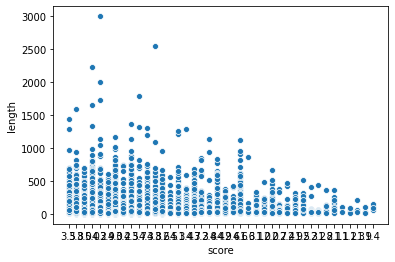

In [178]:
import seaborn as sns 
sns.scatterplot(x=data["score"],y=data["length"])

In [179]:
data[data["length"]==3002]

title  ... length
427289  „É¨„Éá„Ç£„Éª„Éó„É¨„Ç§„É§„Éº1|Ready Player One  ...   3002

[1 rows x 8 columns]

#TextCNN„ÇíÁî®„ÅÑ„Å¶„ÇØ„É©„ÇπÂàÜÈ°û„ÇíË°å„ÅÜ

##ËæûÊõ∏„ÅÆÊßãÁØâ

In [201]:
class Vocab(object):
  def __init__(self, word2id={}):
    self.word2id = dict(word2id)
    self.id2word = {v: k for k, v in self.word2id.items()}
  
  def build_vocab(self, sentences, min_count=1):
    """
    „Ç≥„Éº„Éë„Çπ„Åã„ÇâË™ûÂΩô„ÅÆËæûÊõ∏„ÇíÊßãÁØâ„Åô„Çã„É°„ÇΩ„ÉÉ„Éâ

    :param sentences: list of list of str, „Ç≥„Éº„Éë„Çπ
    :param min_count: int, ËæûÊõ∏„Å´Âê´„ÇÅ„ÇãÂçòË™û„ÅÆÊúÄÂ∞èÂá∫ÁèæÂõûÊï∞
    """
    word_counter = {}
    for sentence in sentences:
      for word in sentence:
        # dict.get(key, 0)„ÅØdict„Å´dict[key],„Å™„Åë„Çå„Å∞0„ÇíËøî„Åô
        word_counter[word] = word_counter.get(word, 0) + 1
    
    #min_countÂõû‰ª•‰∏äÂá∫Áèæ„Åô„ÇãÂçòË™û„ÇíÂä†„Åà„Çã
    for word, count in sorted(word_counter.items(), key=lambda x: -x[1]):
      if count < min_count : 
        break 
      _id = len(self.word2id)
      self.word2id.setdefault(word, _id)
      self.id2word[_id] = word 
    
    #Ë™ûÂΩô„Å´Âê´„Åæ„Çå„ÇãÂçòË™û„ÅÆÂá∫ÁèæÂõûÊï∞„Çí‰øùÊåÅ„Åô„Çã
    #self.raw_vocab = {w: word_counter[w] for w in self.word2id.keys() if w in word_counter }


In [202]:
# ÁâπÊÆä„Å™„Éà„Éº„ÇØ„É≥„ÅØ‰∫ãÂâç„Å´ÂÆöÁæ©„Åó„Å¶„Åä„Åè
PAD_TOKEN = '<PAD>'  # „Éê„ÉÉ„ÉÅÂá¶ÁêÜ„ÅÆÈöõ„Å´„ÄÅÁü≠„ÅÑÁ≥ªÂàó„ÅÆÊú´Â∞æ„ÇíÂüã„ÇÅ„Çã„Åü„ÇÅ„Å´‰Ωø„ÅÜ ÔºàPaddingÔºâ
BOS_TOKEN = '<S>'  # Á≥ªÂàó„ÅÆÂßã„Åæ„Çä„ÇíË°®„Åô ÔºàBeggining of sentenceÔºâ
EOS_TOKEN = '</S>'  # Á≥ªÂàó„ÅÆÁµÇ„Çè„Çä„ÇíË°®„Åô ÔºàEnd of sentenceÔºâ
UNK_TOKEN = '<UNK>'  # Ë™ûÂΩô„Å´Â≠òÂú®„Åó„Å™„ÅÑÂçòË™û„ÇíË°®„Åô ÔºàUnknownÔºâ
PAD = 0
BOS = 1
EOS = 2
UNK = 3

MIN_COUNT = 1  # Ë™ûÂΩô„Å´Âê´„ÇÅ„ÇãÂçòË™û„ÅÆÊúÄ‰ΩéÂá∫ÁèæÂõûÊï∞

# ÂçòË™û„ÇíID„Å´Â§âÊèõ„Åô„ÇãËæûÊõ∏„ÅÆÂàùÊúüÂÄ§„ÇíË®≠ÂÆö
word2id = {
    PAD_TOKEN: PAD,
    BOS_TOKEN: BOS,
    EOS_TOKEN: EOS,
    UNK_TOKEN: UNK,
    }

vocab = Vocab(word2id=word2id)
vocab.build_vocab(data["review_tokenize"].values.tolist(), min_count=MIN_COUNT)
print("Ë™ûÂΩôÊï∞:", len(vocab.word2id))

Ë™ûÂΩôÊï∞: 3255


##ÂçòË™û„ÅÆIDÂåñ

In [203]:
def sentence_to_ids(vocab, sen):
  """
  ÂçòË™û„ÅÆ„É™„Çπ„Éà„ÇíID„ÅÆ„É™„Çπ„Éà„Å´Â§âÊèõ„Åô„ÇãÈñ¢Êï∞
  :param vocab: class Vocab object
  :param sen : list of str, Êñá„ÇíÂàÜ„Åã„Å°Êõ∏„Åç„Åó„Å¶Âæó„Çâ„Çå„ÅüÂçòË™û„ÅÆ„É™„Çπ„Éà
  """
  #ËæûÊõ∏„Å´„Å™„ÅÑË®ÄËëâ„Å´UNK„ÇíÂâ≤„ÇäÂΩì„Å¶„Çã
  out = [vocab.word2id.get(word, UNK) for word in sen ]
  return out 

#Êó•Êú¨Ë™û„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÇíÂçòË™ûID„Å´Â§âÊèõ„Åô„Çã
id_text = [sentence_to_ids(vocab, sen) for sen in data["review_tokenize"].values.tolist()]

In [204]:
print(data["review_tokenize"].values.tolist()[1])
print(id_text[1])

ÔæÉÔæöÔæãÔæû „Åß Ë¶≥ „Åæ„Åó „Åü ! Ëâ≤„Çì„Å™ Êò†Áîª „ÇÑ Êòî „ÅÆ Èü≥Ê•Ω „Çí ÔΩ§ ÂΩ∑ÂΩø „Å® „Åï „Åõ„Çã „Çà„ÅÜ „Å™ Êñ∞„Åó„Åè „Å¶ Êáê„Åã„Åó„ÅÑ Êò†Áîª ÔΩ° ÂÆ∂Êóè „Å® „Åì„Çå „ÅØ „ÅÇ„Çå „Å† „Å≠ ÔΩ§ Êòî „ÅØ„ÇÑ„Å£ „Åü Èü≥Ê•Ω „Å† „Å≠ „Å£„Å¶ Ë©±„Åó „Å™„Åå„Çâ Ë¶≥„Çã „ÅÆ „Åå Ê•Ω„Åó„Åã„Å£ „Åü „Åß„Åô ÔΩ°
[69, 99, 70, 8, 4, 16, 4, 75, 4, 32, 13, 4, 6, 4, 29, 4, 199, 31, 9, 4, 40, 43, 4, 59, 4, 474, 4, 5, 4, 220, 67, 4, 38, 4, 17, 4, 1102, 1121, 4, 15, 4, 61, 4, 111, 21, 4, 58, 26, 4, 9, 4, 282, 13, 30, 4, 10, 4, 403, 18, 13, 7, 4, 40, 43, 4, 14, 4, 472, 909, 4, 15, 4, 36, 28, 4, 23, 4, 42, 28, 4, 33, 4, 120, 4, 17, 4, 474, 4, 23, 59, 11, 4, 6, 4, 220, 67, 4, 33, 4, 120, 4, 11, 10, 4, 204, 13, 4, 9, 19, 27, 4, 75, 21, 4, 5, 4, 19, 4, 67, 13, 18, 11, 4, 6, 4, 16, 34, 4, 14]


#DataLoader„ÅÆÂÆöÁæ©

In [ ]:
class DataLoader(object):
  def __init__(self, src_insts, tgt_insts, batch_size, shuffle=True):
    """
    :param src_insts: list, ÂÖ•ÂäõË®ÄË™û„ÅÆÊñáÁ´†„ÅÆ„É™„Çπ„Éà (ÂçòË™ûID„ÅÆ„É™„Çπ„Éà)
    :param tgt_insts: list, Âá∫ÂäõË®ÄË™û„ÅÆÊñáÁ´†„ÅÆ„É™„Çπ„Éà (ÂçòË™ûID„ÅÆ„É™„Çπ„Éà)
    :param batch_size: int, „Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    :param shuffle: bool, „Çµ„É≥„Éó„É´„Çí„Ç∑„É£„ÉÉ„Éï„É´„Åô„Çã„Åã„Å©„ÅÜ„Åã
    """
    self.data = list(zip(src_insts, tgt_insts))
    self.batch_size = batch_size 
    self.shuffle = shuffle 
    self.start_index = 0 
    self.reset() 

  def reset(self):
    if self.shuffle:
      self.data = shuffle(self.data, random_state=random_state)
    self.start_index = 0 
  def __iter__(self):
    return self 
  def __next__(self):

    def preprocess_seq(seqs):
      # „Éë„Éá„Ç£„É≥„Ç∞
      max_length = max([len(s) for s in seqs])
      data = [s + [PAD] * (max_length - len(s)) for s in seqs]
      # ÂçòË™û„ÅÆ‰ΩçÁΩÆ„ÇíË°®Áèæ„Åô„Çã„Éô„ÇØ„Éà„É´„ÅÆ‰ΩúÊàê
      positions = [[pos+1 if w != PAD else 0 for pos, w in enumerate(seq)] for seq in data ]
      #„ÉÜ„É≥„ÇΩ„É´„Å´Â§âÊèõ
      data_tensor = torch.tensor(data, dtype=torch.long, device)
      position_tensor = torch.tensor(positions, dtype=torch.long, device=device)
      return data_tensor, position_tensor